<a href="https://colab.research.google.com/github/RiddhiKakkar/Handwritten-Digits-Recognition/blob/main/DigitsRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

LOADING "MNIST DATA SET"
containing training samples = 60,000, testing samples = 10,000
tensorflow already contain MNIST data set which can be loaded using Keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

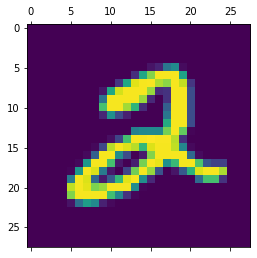

In [7]:
plt.matshow(x_train[5])

In [8]:
y_train[5]

2

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_test_flatten = x_test.reshape(len(x_test),28*28)
x_train_flatten.shape

(60000, 784)

In [12]:
x_test_flatten.shape

(10000, 784)

In [13]:
x_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
model = keras.Sequential([
   keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4685 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3035 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9259


In [15]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2670 - accuracy: 0.9261


[0.26702338457107544, 0.9261000156402588]

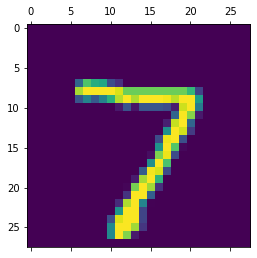

In [16]:
plt.matshow(x_test[0])

In [17]:
y_pred = model.predict(x_test_flatten)
y_pred[0]

array([2.0382315e-02, 2.8085930e-07, 4.0387183e-02, 9.5388365e-01,
       2.5705397e-03, 8.3494723e-02, 1.0748464e-06, 9.9978906e-01,
       8.6739391e-02, 6.2466353e-01], dtype=float32)

In [18]:
np.argmax(y_pred[0])

7

In [19]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [20]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    1,    0,    5,    5,    4,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   5,    7,  928,   17,    8,    2,   13,   12,   36,    4],
       [   3,    0,   16,  930,    0,   19,    2,   11,   22,    7],
       [   1,    1,    3,    1,  912,    0,   12,    4,   10,   38],
       [  13,    2,    4,   41,   11,  753,   18,    9,   34,    7],
       [  11,    3,    4,    1,    7,    8,  919,    2,    3,    0],
       [   1,    5,   21,    8,    5,    0,    0,  956,    3,   29],
       [   8,    6,    6,   22,    9,   17,   10,   12,  877,    7],
       [  10,    6,    2,   12,   26,    4,    0,   29,    6,  914]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

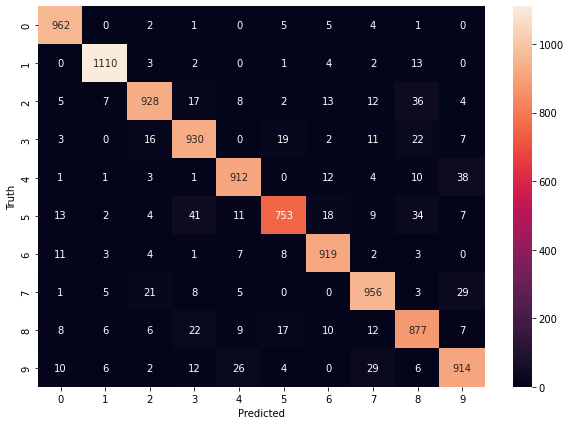

In [21]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
# adding hidden layer
model = keras.Sequential([
   keras.layers.Dense(100, input_shape=(784,),activation='relu'),
   keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2732 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1249 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0868 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0644 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0515 - accuracy: 0.9843


In [23]:
model.evaluate(x_test_flatten, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0817 - accuracy: 0.9751


[0.0816560611128807, 0.9750999808311462]

Text(69.0, 0.5, 'Truth')

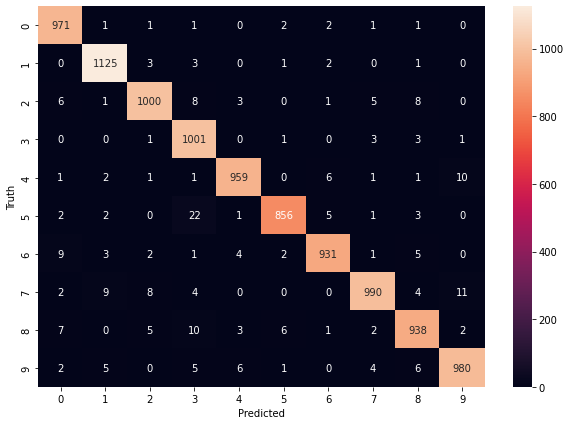

In [24]:
y_pred = model.predict(x_test_flatten)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
# flattening array through keras.Flatten
model = keras.Sequential([
   keras.layers.Flatten(input_shape=(28,28)),
   keras.layers.Dense(100, activation='relu'),
   keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2760 - accuracy: 0.9216
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1287 - accuracy: 0.9617
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0899 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0678 - accuracy: 0.9789
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0520 - accuracy: 0.9844
